<a href="https://colab.research.google.com/github/gandirakesh/2303A51721_applications_of_data_mining/blob/main/instagram_data_india_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.decomposition import PCA
# 📥 Step 2: Load Data
df=pd.read_csv("/content/instagram_data_india_updated.csv")
# 📊 Step 3: Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   #                   300 non-null    int64 
 1   NAME                300 non-null    object
 2   FOLLOWERS           300 non-null    object
 3   ER                  300 non-null    object
 4   COUNTRY             300 non-null    object
 5   TOPIC OF INFLUENCE  300 non-null    object
 6   POTENTIAL REACH     300 non-null    object
dtypes: int64(1), object(6)
memory usage: 16.5+ KB
None
                #
count  300.000000
mean   150.500000
std     86.746758
min      1.000000
25%     75.750000
50%    150.500000
75%    225.250000
max    300.000000
#                     0
NAME                  0
FOLLOWERS             0
ER                    0
COUNTRY               0
TOPIC OF INFLUENCE    0
POTENTIAL REACH       0
dtype: int64


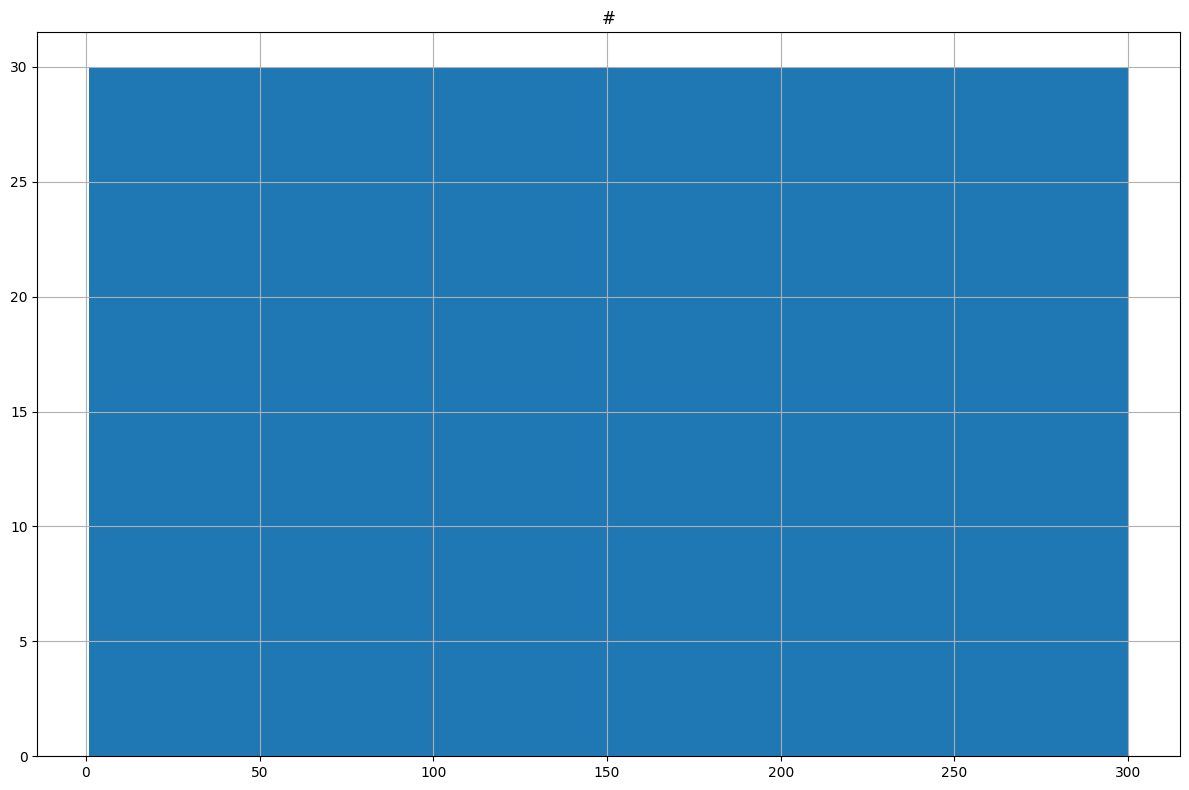

In [6]:
df.hist(figsize=(12, 8))
plt.tight_layout() # Now plt is defined and can be used
plt.show()

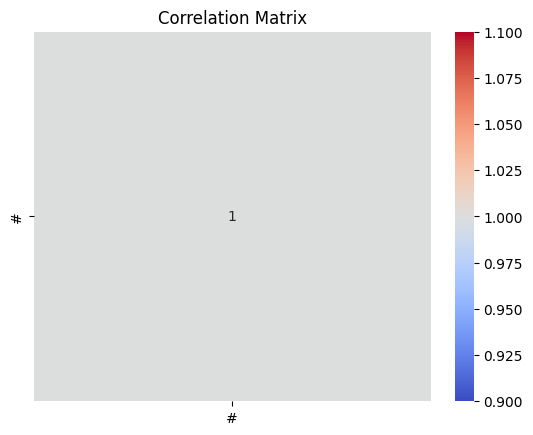

In [7]:
# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [10]:
# 📋 Step 4: Data Preprocessing
# Encode categorical variables
le=LabelEncoder()
if 'nams' in df.columns:
 df['nams_encoded']=le.fit_transform(df['nams'])
# Drop irrelevant or non-numeric columns for modeling
df_model=df.select_dtypes(include=[np.number]).dropna()

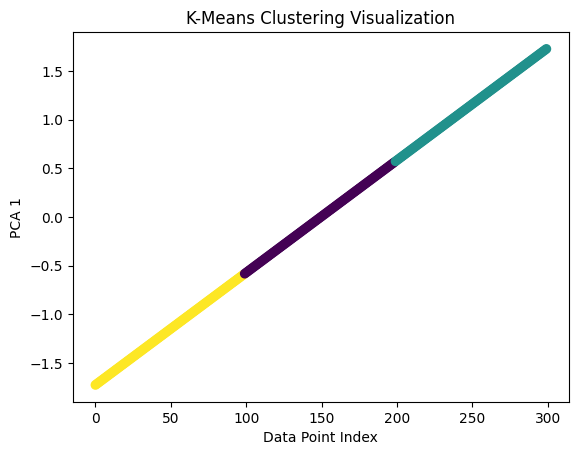

Silhouette Score: 0.5860937890085824


In [14]:
# Standardize data
scaler = StandardScaler() # Fixed the syntax here by removing extra line breaks and = signs
scaled_data = scaler.fit_transform(df_model)
# 🎯 Step 5: Clustering (K-Means)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['cluster'] = clusters
# Visualize clusters using PCA
# Adjust n_components to be 1, as there is only 1 feature in scaled_data
pca = PCA(n_components=1)
pca_components = pca.fit_transform(scaled_data)
# Since there's only one component, plot against a range of values
plt.scatter(range(len(pca_components)), pca_components[:, 0], c=clusters, cmap='viridis')
plt.title("K-Means Clustering Visualization")
plt.xlabel("Data Point Index")
plt.ylabel("PCA 1")
plt.show()
print(f"Silhouette Score: {silhouette_score(scaled_data, clusters)}")

In [17]:
# 📈 Step 6: Regression (if there's a numerical target column)
# Assuming 'cluster' column is not the target, and you have other numeric columns
# Replace 'NAME' with an actual numeric column from your DataFrame
target_column = '#'  # Example: Replace with an actual numeric column name

# Select relevant numeric features, excluding the target column
numeric_features = df_model.select_dtypes(include=[np.number]).columns
numeric_features = numeric_features[numeric_features != target_column]
X = df_model[numeric_features]

# Use the target_column variable to access the target column
y = df_model[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print("Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred))

ValueError: at least one array or dtype is required

In [19]:
# ✅ Summary
print("\nKey Techniques Applied:")
print("- EDA: Data inspection, correlation analysis, visualizations")
print("- Preprocessing: Label encoding, scaling, null handling")
print("- Clustering: K-Means, PCA for visualization")
print("- Regression: Linear model with evaluation")


Key Techniques Applied:
- EDA: Data inspection, correlation analysis, visualizations
- Preprocessing: Label encoding, scaling, null handling
- Clustering: K-Means, PCA for visualization
- Regression: Linear model with evaluation


In [20]:
df.head()

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH,cluster
0,1,Virat Kohli @virat.kohli,267.1M,0.02%,India,Sports Cricket Athlete,80.1M,2
1,2,Narendra Modi @narendramodi,87.3M,2.23%,India,Politics,26.2M,2
2,3,Alia Bhatt 💛 @aliaabhatt,83.7M,0.02%,India,Acting and Drama Celebrity Actors Actor,25.1M,2
3,4,Katrina Kaif @katrinakaif,79.7M,0.87%,India,Beauty and Self Care Celebrity Actors Actor,23.9M,2
4,5,दीपिका पादुकोण @deepikapadukone,78.9M,2.18%,India,Entertainment and Music Actors,23.7M,2


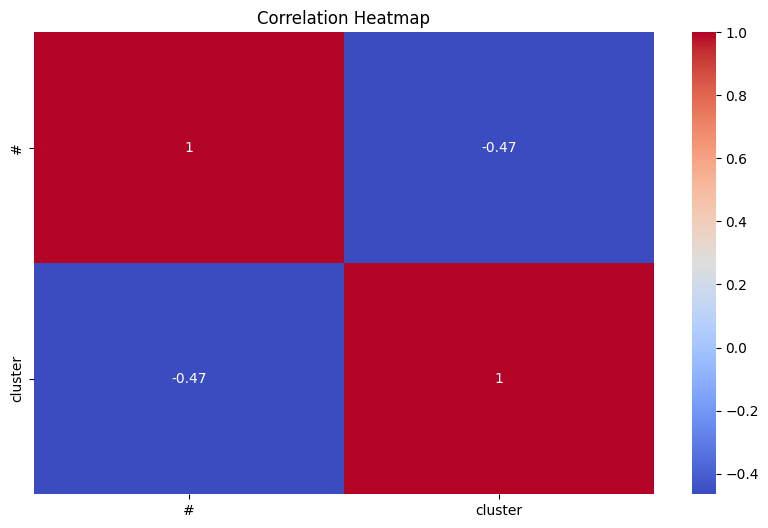

In [21]:
#Heatmap of Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Text(0, 0.5, 'Frequency')

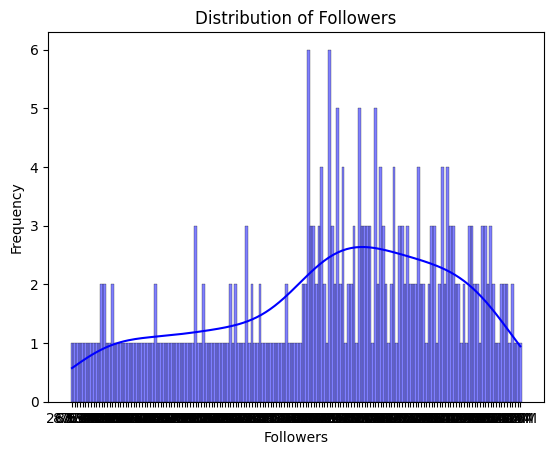

In [22]:
#Distribution Plot of Followers
sns.histplot(df['FOLLOWERS'], kde=True, color='blue')
plt.title("Distribution of Followers")
plt.xlabel("Followers")
plt.ylabel("Frequency")

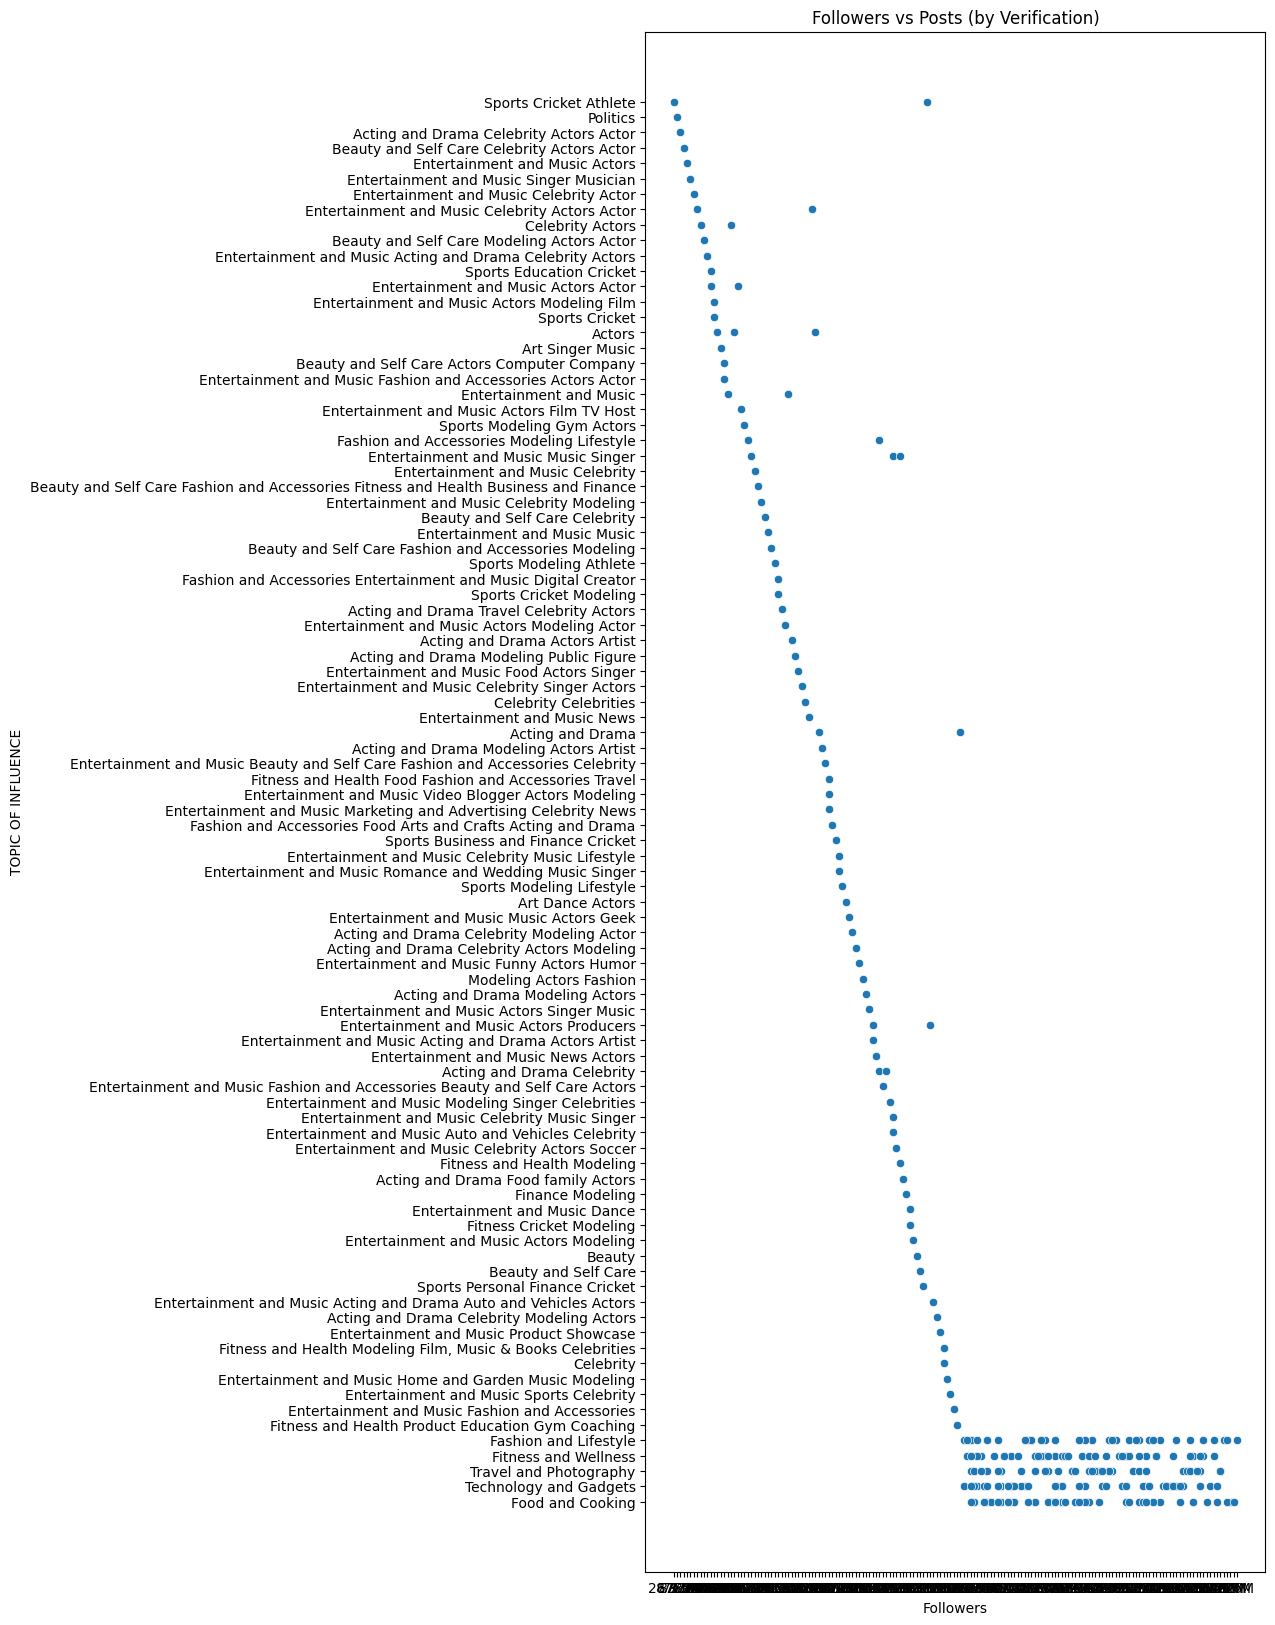

In [23]:
#Scatter Plot (Followers vs TOPIC OF INFLUENCE )
plt.figure(figsize=(8, 20))
sns.scatterplot(data=df, x='FOLLOWERS', y='TOPIC OF INFLUENCE')
plt.title("Followers vs Posts (by Verification)")
plt.xlabel("Followers")
plt.ylabel("TOPIC OF INFLUENCE")
plt.show()

In [25]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Convert followers to numeric function
def convert_to_number(x):
    if isinstance(x, str):
        x = x.strip().upper()
        if x.endswith('K'):
            return float(x[:-1]) * 1_000
        elif x.endswith('M'):
            return float(x[:-1]) * 1_000_000
        elif x.endswith('B'):
            return float(x[:-1]) * 1_000_000_000
        else:
            try:
                return float(x)
            except:
                return None
    return x
# 📥 Load dataset
df = pd.read_csv("/content/instagram_data_india_updated.csv")
# Apply convert_to_number to relevant columns
df['FOLLOWERS'] = df['FOLLOWERS'].apply(convert_to_number)
df['POTENTIAL REACH'] = df['POTENTIAL REACH'].apply(convert_to_number)
# Preprocess data (Drop rows with missing values in important columns)
df = df.dropna(subset=['FOLLOWERS', 'POTENTIAL REACH'])
# Optionally drop unnecessary columns
if 'nams' in df.columns:
    df.drop(columns=['nams'], inplace=True)
# 🧠 Feature Selection
X = df[['FOLLOWERS']] # Feature
y = df['POTENTIAL REACH'] # Target
# ⚖ Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Pass X which already has numeric FOLLOWERS
# 🔀 Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # y should also be preprocessed
# 🤖 Fit Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
# 🎯 Predictions
y_pred = model.predict(X_test)